In [8]:
import pandas as pd
import seaborn as sns

In [9]:
data = pd.read_csv('./data.csv')
data.head()

,Semester,CRN,Course,Course title,Grade,Grade Points
0,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,A,4.0
1,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,A-,3.7
2,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,B+,3.3
3,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,B,3.0
4,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,B,3.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Semester      8 non-null      object 
 1   CRN           8 non-null      int64  
 2   Course        8 non-null      object 
 3   Course title  8 non-null      object 
 4   Grade         8 non-null      object 
 5   Grade Points  8 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 512.0+ bytes


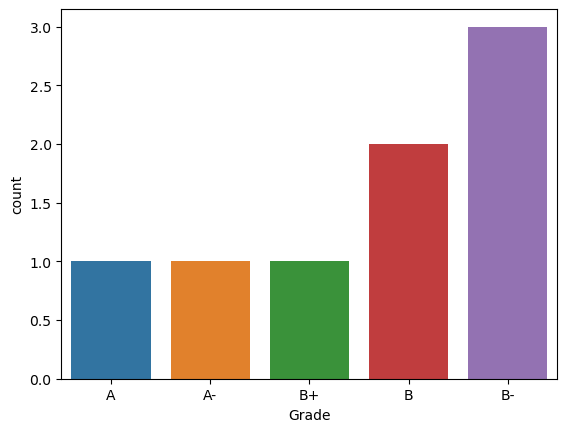

In [11]:
plt = sns.countplot(x ='Grade', data = data)

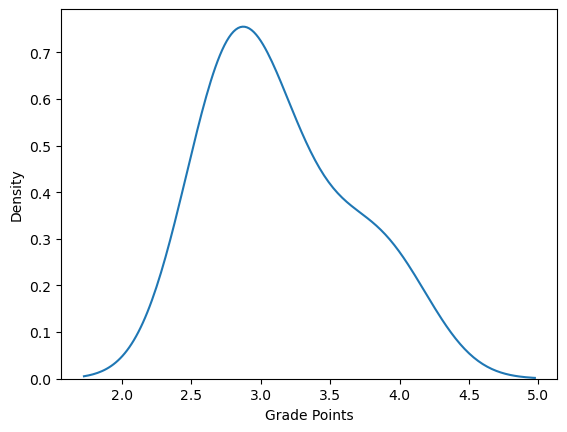

In [13]:
plot = sns.kdeplot(data=data, x="Grade Points")